In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/RBS

Customers.xlsx	Orders.xlsx


In [ ]:
#Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
#Setting large figure size for Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27),"font.size":20,"axes.titlesize":20,"axes.labelsize":18})

In [ ]:
data_dir = '/content/drive/MyDrive/RBS'
orders = pd.read_excel(data_dir+'/Orders.xlsx')
customers = pd.read_excel(data_dir+'/Customers.xlsx')

In [ ]:
print(orders.shape)
orders.head()

(131706, 8)


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1.0,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1.0,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1.0,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1.0,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1.0,6.88


In [ ]:
print(customers.shape)
customers.head()

(22625, 4)


,Customer_ID,GENDER,AGE,GEOGRAPHY
0,2547,F,48,Spain
1,822,F,39,Germany
2,3686,F,56,Greece
3,3719,F,49,Spain
4,9200,M,18,Italy


In [ ]:
print(orders['SKU'].value_counts())
print(orders['SKU_Category'].value_counts())

UNJKW    2007
COWU2     791
OV1P9     737
M6J9W     698
C6TXL     689
         ... 
DV08L       1
NXHF1       1
4YL6Q       1
T6EUH       1
9E9GV       1
Name: SKU, Length: 5242, dtype: int64
N8U    10913
R6E     5099
LPF     5062
P42     4836
U5F     4570
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64


In [ ]:
orders.describe()

,id,Customer_ID,Transaction_ID,Quantity,Sales_Amount
count,131706.000000,131706.000000,131706.000000,131706.000000,131706.000000
mean,65853.500000,12386.450367,32389.604187,1.485318,11.981524
std,38020.391614,6086.447552,18709.901238,3.872666,19.359699
min,1.000000,1.000000,1.000000,0.010000,0.020000
25%,32927.250000,7349.000000,16134.000000,1.000000,4.230000
50%,65853.500000,13496.000000,32620.000000,1.000000,6.920000
75%,98779.750000,17306.000000,48548.000000,1.000000,12.330000
max,131706.000000,22625.000000,64682.000000,400.000000,707.730000


In [ ]:
orders[orders.Quantity % 1 != 0]

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
125,126,2021-01-02,4122,76,SJS,4BPPU,0.67,118.35
1111,1112,2021-01-05,6543,547,PBV,8OXUS,0.34,13.44
1289,1290,2021-01-06,269,643,C3Y,OUWHY,0.25,2.08
1290,1291,2021-01-06,269,643,C3Y,RMOC0,0.25,2.19
1504,1505,2021-01-07,1568,757,XG4,JSLMY,0.10,4.05
...,...,...,...,...,...,...,...,...
128879,128880,2021-07-26,1703,36460,SIM,9EZV7,0.50,9.40
128916,128917,2021-07-27,18060,36474,C3Y,HIWFG,0.25,2.19
129067,129068,2021-07-27,19479,36541,PBV,55TC6,0.33,12.98
129377,129378,2021-07-28,20309,36677,PBV,05ZN9,0.34,11.98


In [ ]:
orders = orders.loc[orders.Quantity % 1 == 0]
orders.Quantity = orders.Quantity.apply(lambda x: int(x))
orders.head()

<ipython-input-10-4792d8773ff7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders.Quantity = orders.Quantity.apply(lambda x: int(x))


,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
0,1,2021-01-02,2547,1,X52,0EM7L,1,3.13
1,2,2021-01-02,822,2,2ML,68BRQ,1,5.46
2,3,2021-01-02,3686,3,0H2,CZUZX,1,6.35
3,4,2021-01-02,3719,4,0H2,549KK,1,5.59
4,5,2021-01-02,9200,5,0H2,K8EHH,1,6.88


In [ ]:
orders[orders.Quantity > 100]

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
17084,17085,2021-02-19,6869,8186,LGI,VWLV9,176,74.80
64680,64681,2021-06-29,17025,32069,LGI,VWLV9,176,74.80
77676,77677,2021-09-07,19791,42595,H8O,CKDW0,400,16.37
94222,94223,2021-10-13,20055,49727,H8O,CKDW0,200,8.18
112719,112720,2021-11-27,1694,57951,H8O,CKDW0,300,12.27
113907,113908,2021-11-30,11634,58440,XG4,MAJO7,200,15.00
118682,118683,2021-12-10,16147,60457,H8O,CKDW0,200,8.18
121888,121889,2021-12-16,18365,61798,H8O,CKDW0,200,8.18


In [ ]:
orders[orders.Quantity > 20]

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
609,610,2021-01-04,4707,316,JI5,BBC93,60,22.91
910,911,2021-01-05,5767,460,JI5,TKGM0,28,30.16
1459,1460,2021-01-07,3290,735,JI5,BBC93,90,34.37
1834,1835,2021-01-08,3549,922,JI5,TD3DD,74,20.17
1906,1907,2021-01-08,1923,944,JI5,CYRX4,78,21.27
...,...,...,...,...,...,...,...,...
129831,129832,2021-07-29,8750,36880,JI5,TD3DD,60,16.37
130366,130367,2021-08-01,1304,37107,JI5,TD3DD,24,6.54
130573,130574,2021-08-01,12790,37186,JI5,TD3DD,24,6.54
130901,130902,2021-07-01,9094,32531,PZW,Y4S8V,25,12.27


In [ ]:
orders[orders.SKU == 'MAJO7']

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
34020,34021,2021-04-08,17951,16671,XG4,MAJO7,12,0.90
54133,54134,2021-05-30,19996,26889,XG4,MAJO7,20,1.75
67803,67804,2021-08-09,19996,38278,XG4,MAJO7,20,1.75
70714,70715,2021-08-17,20576,39484,XG4,MAJO7,4,0.34
74011,74012,2021-08-25,10712,40935,XG4,MAJO7,100,7.50
74745,74746,2021-08-28,16783,41258,XG4,MAJO7,12,0.90
79395,79396,2021-09-11,20173,43325,XG4,MAJO7,5,0.38
80579,80580,2021-09-14,12524,43806,XG4,MAJO7,75,5.62
105668,105669,2021-11-10,20537,54829,XG4,MAJO7,90,7.88
112676,112677,2021-11-27,16916,57924,XG4,MAJO7,100,7.50


In [ ]:
customers.describe()

,Customer_ID,AGE
count,22625.000000,22625.000000
mean,11313.000000,37.919646
std,6531.419256,12.226050
min,1.000000,18.000000
25%,5657.000000,29.000000
50%,11313.000000,38.000000
75%,16969.000000,46.000000
max,22625.000000,75.000000


In [ ]:
customers.GEOGRAPHY.value_counts()

Germany        7970
Italy          4480
France         2644
Greece         2269
UK             2264
Spain          1651
Netherlands    1347
Name: GEOGRAPHY, dtype: int64

In [ ]:
customers.GENDER.value_counts()

F    11328
M    11297
Name: GENDER, dtype: int64

In [ ]:
orders.SKU_Category.value_counts()

N8U    10913
R6E     5099
LPF     5046
P42     4836
U5F     4568
       ...  
M8H        3
U3N        2
QON        1
2JO        1
OTK        1
Name: SKU_Category, Length: 187, dtype: int64

In [ ]:
_temp = pd.DataFrame(orders.SKU_Category.value_counts(ascending = True))

In [ ]:
_temp.head()

,SKU_Category
OTK,1
2JO,1
QON,1
U3N,2
M8H,3


In [ ]:
print(len(_temp))
print(len(_temp[_temp.SKU_Category > 2000]))

187
16


In [ ]:
orders.groupby('Customer_ID').max('SKU_Category')

,id,Transaction_ID,Quantity,Sales_Amount
Customer_ID,,,,
1,7286,3442,1,10.50
2,61445,30451,1,15.00
3,157,90,2,8.16
4,105232,54618,1,8.65
5,88854,33043,4,20.13
...,...,...,...,...
22621,118886,60552,2,7.50
22622,122494,62034,1,6.07
22623,124692,63025,2,97.86


In [ ]:
orders.tail()

,id,Date,Customer_ID,Transaction_ID,SKU_Category,SKU,Quantity,Sales_Amount
131701,131702,2021-07-04,20203,32900,IEV,FO112,3,6.46
131702,131703,2021-07-04,20203,32900,N8U,I36F2,1,4.50
131703,131704,2021-07-04,20203,32900,U5F,4X8P4,1,5.19
131704,131705,2021-07-04,20203,32900,0H2,ZVTO4,1,4.57
131705,131706,2021-07-04,20203,32900,Q4N,QM9BP,1,13.68


In [ ]:
transac_df = orders.groupby("Transaction_ID").agg(Customer_ID = ('Customer_ID', 'max'), diff_items = ('SKU', 'nunique'), total_items = ('Quantity', 'sum'),
                                                 order_value = ('Sales_Amount','sum'))
transac_df[transac_df.index == 32900]

,Customer_ID,diff_items,total_items,order_value
Transaction_ID,,,,
32900,20203,7,11,47.92


### 1 Statistics

In [ ]:
transac_df = orders.groupby("Transaction_ID").agg(Customer_ID = ('Customer_ID', 'max'), diff_items = ('SKU', 'nunique'), total_items = ('Quantity', 'sum'),
                                                 order_value = ('Sales_Amount','sum'))
transac_df = transac_df.groupby("Customer_ID").agg(num_orders = ('Customer_ID', 'count'), avg_diff_items = ('diff_items', np.mean), items_bought = ('total_items', 'sum'),
                                                   avg_items = ('total_items', np.mean),total_revenue = ('order_value', 'sum'), avg_order_value = ('order_value', np.mean),
                                                   max_value = ('order_value', 'max'), min_value = ('order_value', 'min'), max_item_bought = ('total_items', 'max'),
                                                   min_item_bought = ('total_items', 'min'))
transac_df

,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought
Customer_ID,,,,,,,,,,
1,1,2.00,2,2.0,16.29,16.290,16.29,16.29,2,2
2,2,1.00,2,1.0,22.77,11.385,15.00,7.77,1,1
3,1,3.00,4,4.0,10.92,10.920,10.92,10.92,4,4
4,2,2.50,5,2.5,33.29,16.645,26.60,6.69,4,1
5,5,1.00,14,2.8,78.82,15.764,20.13,7.06,4,1
...,...,...,...,...,...,...,...,...,...,...
22621,1,2.00,3,3.0,9.69,9.690,9.69,9.69,3,3
22622,1,1.00,1,1.0,6.07,6.070,6.07,6.07,1,1
22623,1,2.00,3,3.0,128.01,128.010,128.01,128.01,3,3


In [ ]:
item_df = orders.groupby("Customer_ID").agg(first_date=('Date','min'), last_date=('Date','max'),
                                              most_cat = ('SKU_Category', lambda x: x.value_counts().index[0]), most_item_SKU=('SKU', lambda x: x.value_counts().index[0]))
item_df

,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,
1,2021-01-22,2021-01-22,0H2,6OUVC
2,2021-03-24,2021-06-19,TVL,2SLS0
3,2021-01-02,2021-01-02,TW8,Y1M2E
4,2021-07-11,2021-11-09,69B,APEJQ
5,2021-02-09,2021-07-05,P42,DMJ70
...,...,...,...,...
22621,2021-12-10,2021-12-10,R6E,UN0SI
22622,2021-12-16,2021-12-16,P42,OV1P9
22623,2021-12-21,2021-12-21,1EO,PTA6G


In [ ]:
cust_df = pd.merge(transac_df, item_df, how='left', left_index=True, right_index=True)
cust_df

,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,,,,,,,,,,,
1,1,2.00,2,2.0,16.29,16.290,16.29,16.29,2,2,2021-01-22,2021-01-22,0H2,6OUVC
2,2,1.00,2,1.0,22.77,11.385,15.00,7.77,1,1,2021-03-24,2021-06-19,TVL,2SLS0
3,1,3.00,4,4.0,10.92,10.920,10.92,10.92,4,4,2021-01-02,2021-01-02,TW8,Y1M2E
4,2,2.50,5,2.5,33.29,16.645,26.60,6.69,4,1,2021-07-11,2021-11-09,69B,APEJQ
5,5,1.00,14,2.8,78.82,15.764,20.13,7.06,4,1,2021-02-09,2021-07-05,P42,DMJ70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22621,1,2.00,3,3.0,9.69,9.690,9.69,9.69,3,3,2021-12-10,2021-12-10,R6E,UN0SI
22622,1,1.00,1,1.0,6.07,6.070,6.07,6.07,1,1,2021-12-16,2021-12-16,P42,OV1P9
22623,1,2.00,3,3.0,128.01,128.010,128.01,128.01,3,3,2021-12-21,2021-12-21,1EO,PTA6G


In [ ]:
customers.set_index('Customer_ID', inplace=True)
customers

,GENDER,AGE,GEOGRAPHY
Customer_ID,,,
2547,F,48,Spain
822,F,39,Germany
3686,F,56,Greece
3719,F,49,Spain
9200,M,18,Italy
...,...,...,...
14811,M,32,Germany
3232,F,47,Spain
5751,M,34,Germany


In [ ]:
customers_df = pd.merge(customers, cust_df, left_index=True, right_index=True, how='left')
customers_df

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU
Customer_ID,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,5.46,3.0,1.0,2021-01-02,2021-02-03,TW8,68BRQ
3686,F,56,Greece,15.0,3.333333,63.0,4.200000,405.44,27.029333,138.13,6.35,20.0,1.0,2021-01-02,2021-03-08,0H2,B87MU
3719,F,49,Spain,10.0,4.700000,70.0,7.000000,420.72,42.072000,224.98,1.58,35.0,1.0,2021-01-02,2021-03-05,0KX,W14J3
9200,M,18,Italy,2.0,1.000000,2.0,1.000000,18.01,9.005000,11.13,6.88,1.0,1.0,2021-01-02,2021-04-09,0H2,K8EHH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14811,M,32,Germany,1.0,1.000000,1.0,1.000000,26.54,26.540000,26.54,26.54,1.0,1.0,2021-07-04,2021-07-04,LPF,UPB37
3232,F,47,Spain,1.0,2.000000,2.0,2.000000,12.89,12.890000,12.89,12.89,2.0,2.0,2021-08-01,2021-08-01,QCG,M4TM4
5751,M,34,Germany,1.0,3.000000,3.0,3.000000,59.59,59.590000,59.59,59.59,3.0,3.0,2021-07-04,2021-07-04,LSD,NSGRM


In [ ]:
customers_df["age_bin"] = pd.cut(customers_df["AGE"], bins = [18 , 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 80], right = False,
                                 labels=["18-24", "25-29", "30-34", "35-39", "40-44", "45-49", "50-54", "55-59", "60-64", "65-69", "70+"])
customers_df.head(5)

,GENDER,AGE,GEOGRAPHY,num_orders,avg_diff_items,items_bought,avg_items,total_revenue,avg_order_value,max_value,min_value,max_item_bought,min_item_bought,first_date,last_date,most_cat,most_item_SKU,age_bin
Customer_ID,,,,,,,,,,,,,,,,,,
2547,F,48,Spain,7.0,2.285714,22.0,3.142857,121.36,17.337143,39.62,3.13,6.0,1.0,2021-01-02,2021-04-16,X52,885U7,45-49
822,F,39,Germany,3.0,1.666667,5.0,1.666667,20.40,6.800000,8.59,5.46,3.0,1.0,2021-01-02,2021-02-03,TW8,68BRQ,35-39
3686,F,56,Greece,15.0,3.333333,63.0,4.200000,405.44,27.029333,138.13,6.35,20.0,1.0,2021-01-02,2021-03-08,0H2,B87MU,55-59
3719,F,49,Spain,10.0,4.700000,70.0,7.000000,420.72,42.072000,224.98,1.58,35.0,1.0,2021-01-02,2021-03-05,0KX,W14J3,45-49
9200,M,18,Italy,2.0,1.000000,2.0,1.000000,18.01,9.005000,11.13,6.88,1.0,1.0,2021-01-02,2021-04-09,0H2,K8EHH,18-24


In [ ]:
def categorical_column_stats(df:pd.DataFrame, columns=list[str], summary_cols=list[str]) -> None:
    for c in columns:
        print("\n"+"-"*30)
        print("Statistics for column {}".format(c))
        print("-"*30)
        for val in df[c].unique():
            print("\n{} == {} : \n".format(c, val))
            for sum_col in summary_cols:

                subset = df[df[c] == val][sum_col]
                print("Average {} = {}".format(sum_col, round(np.mean(subset),2)))

In [ ]:
sum_cols = ['num_orders', 'items_bought', 'total_revenue']
categorical_column_stats(customers_df, ['age_bin', 'GEOGRAPHY', 'GENDER'], sum_cols)


------------------------------
Statistics for column age_bin
------------------------------

age_bin == 45-54 : 

Average num_orders = 2.89
Average items_bought = 8.79
Average total_revenue = 70.57

age_bin == 35-44 : 

Average num_orders = 2.88
Average items_bought = 8.91
Average total_revenue = 69.97

age_bin == 55-64 : 

Average num_orders = 2.69
Average items_bought = 7.76
Average total_revenue = 63.0

age_bin == 18-24 : 

Average num_orders = 2.82
Average items_bought = 8.38
Average total_revenue = 68.14

age_bin == 25-34 : 

Average num_orders = 2.88
Average items_bought = 8.63
Average total_revenue = 71.35

age_bin == 65+ : 

Average num_orders = 2.83
Average items_bought = 9.45
Average total_revenue = 68.81

------------------------------
Statistics for column GEOGRAPHY
------------------------------

GEOGRAPHY == Spain : 

Average num_orders = 2.91
Average items_bought = 9.03
Average total_revenue = 74.2

GEOGRAPHY == Germany : 

Average num_orders = 2.86
Average items_bought

In [ ]:
age_recap = customers_df[["age_bin","items_bought","total_revenue","num_orders"]].groupby("age_bin").mean()

,items_bought,total_revenue,num_orders
age_bin,,,
18-24,8.375280,68.144016,2.815863
25-34,8.627326,71.352943,2.879851
35-44,8.906855,69.968529,2.875356
45-54,8.793574,70.570887,2.894366
55-64,7.755633,63.004916,2.691508
65+,9.448037,68.805127,2.833718


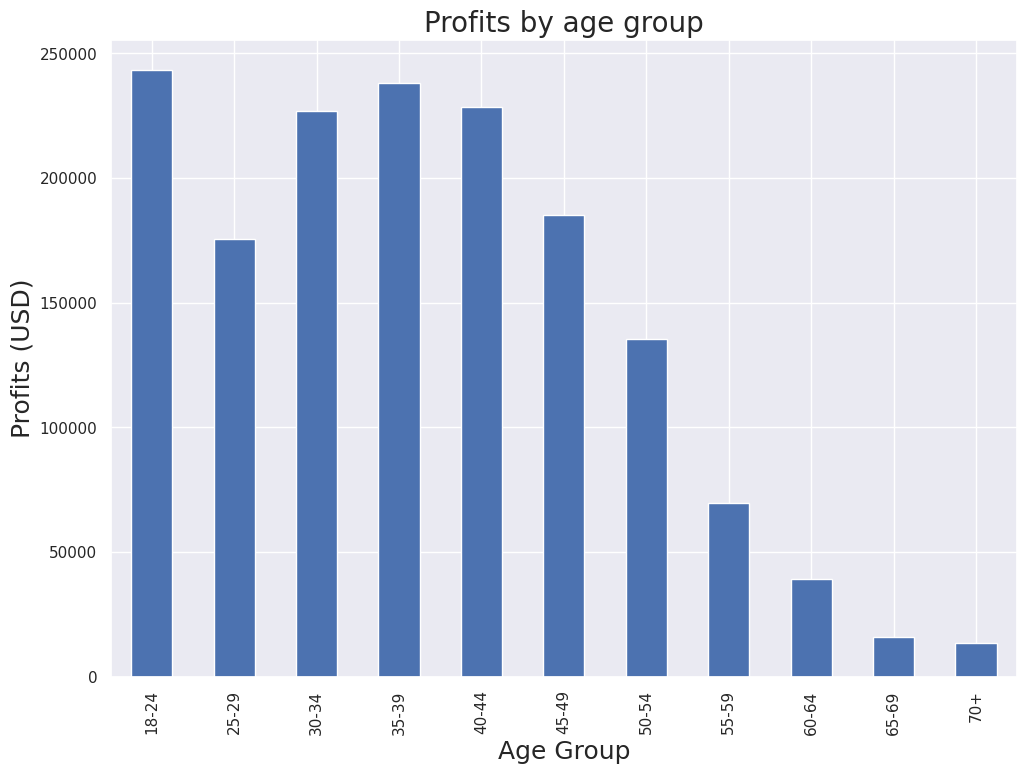

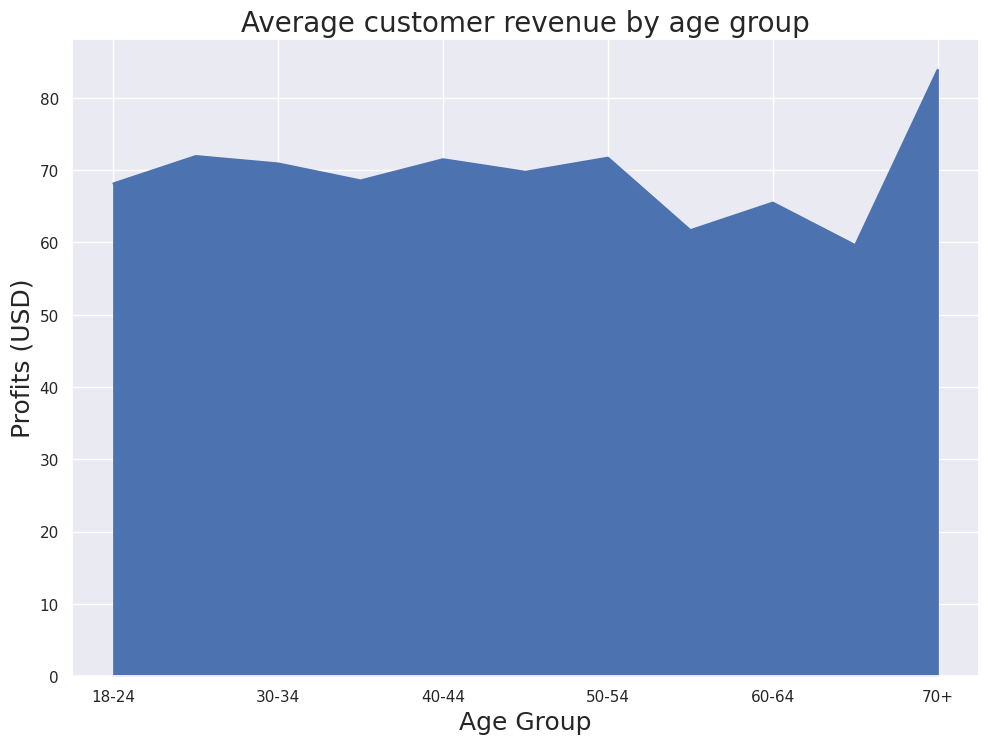

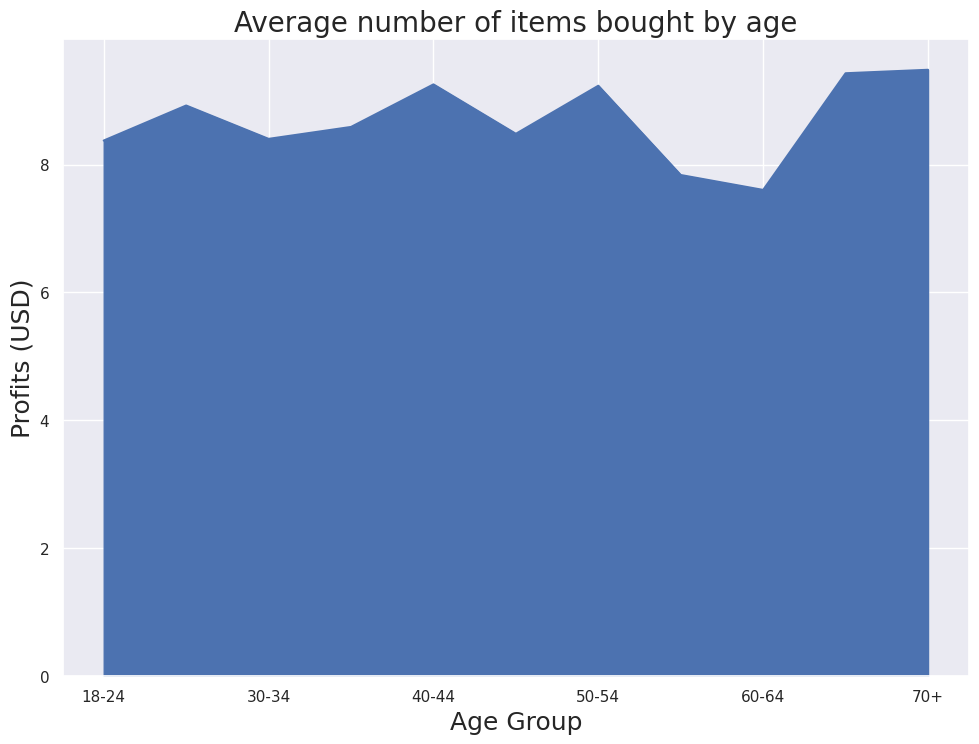

In [ ]:
#Plotting the profits per age group
customers_df[["age_bin","total_revenue"]].groupby("age_bin").sum().reset_index().plot(x="age_bin", y="total_revenue",kind="bar",legend=False)
plt.title('Profits by age group')
plt.ylabel('Profits (USD)')
plt.xlabel('Age Group')
plt.show()

customers_df[["age_bin","total_revenue"]].groupby("age_bin").mean().reset_index().plot(x="age_bin", y="total_revenue",kind="area",legend=False)
plt.title('Average customer revenue by age group')
plt.ylabel('Profits (USD)')
plt.xlabel('Age Group')
plt.show()

customers_df[["age_bin","items_bought"]].groupby("age_bin").mean().reset_index().plot(x="age_bin", y="items_bought",kind="area",legend=False)
plt.title('Average number of items bought by age')
plt.ylabel('Profits (USD)')
plt.xlabel('Age Group')
plt.show()

## 5 CLV calculation
### Churn rate

In [ ]:
num_customers = len(orders.Customer_ID.unique())
churn_df = orders.groupby("Customer_ID").nunique()[["Transaction_ID"]]
churn_rate = 1- len(churn_df[churn_df.Transaction_ID > 1])/num_customers
churn_rate

0.5101390241742673

In [ ]:
churn_df

,Transaction_ID
Customer_ID,
1,1
2,2
3,1
4,2
5,5
...,...
22621,1
22622,1
22623,1


### Average Purchase Frequency

In [ ]:
apf = len(orders.Transaction_ID.unique())/num_customers
apf

2.856017001682458

### Average Purchase Value

In [ ]:
apv = orders.Sales_Amount.sum()/num_customers
apv

69.59138094394757

### Customer Lifetime Value (CLV)

In [ ]:
clv = apv*apf/churn_rate
clv

389.60784752389185